In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
path_git = 'd:/Git_Proyects/Tesis/Base_Twitter/nuevas_series_29_8/'

citas = []
with open('d:/Git_Proyects/Tesis/Base_Twitter/muchas_citas.txt', 'r', encoding = 'utf8') as f:
    Lines = f.readlines()
    for line in Lines:
        citas.append(line)

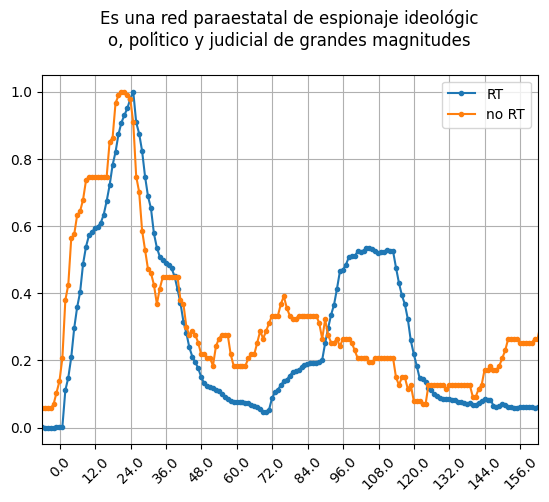

In [153]:
index = 48

df_clus_completo = pd.read_csv(path_git+'Tw_mas_RT_s/Tweets_cluster_con_RT_'+str(index)+'_55.csv')#, dtype={'Tweets':str, 'Fecha':str, 'id':str})
#df_clus_completo = pd.read_csv(path_git+'../Tweets_august/deuda_falopa.csv')
no_medios = ['Twitter for Android', 'Twitter Web App', 'Twitter for iPhone', 'Twitter for iPad', 'Twitter Web Client', 'Mobile Web (M2)', 'Instagram', 'TwotPane for Android', 'Tweetbot for iOS', 'Facebook', 'TweetDeck', 'IFTTT', 'Twitter Media Studio']
def generar_medios(source):
    medios = True
    if source in no_medios or source==np.nan or source == 'NaN':
        medios = False
    return medios

df_clus_completo['medios_2'] = df_clus_completo['source_y'].apply(generar_medios)
# path_git = 'd:/Git_Proyects/Tesis/Base_Twitter/Tw_200_citas_05/'
# #df_clus_completo = pd.read_csv(path_git+'Tweets_cluster_con_RT/no_se_inunda_mas_Macri.csv')
# index = 8
# df_clus_completo = pd.read_csv(path_git+'Tw_'+str(index)+'_Cluster_muchas.csv ')

# df_clus_completo = pd.read_csv(path_git+'../Tweets_cluster_con_RT_Tinelli_055.csv')

df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha_x'], format='%a %b %d %H:%M:%S +0000 %Y')
df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600
#df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - pd.to_datetime('2019-02-27')).dt.total_seconds() / 3600

# fecha_inicial = pd.to_datetime('2023-02-27')
# df_clus_completo = df_clus_completo[df_clus_completo['Fecha'] >= fecha_inicial]
# df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - fecha_inicial).dt.total_seconds() / 3600

categoria = 'RT'

df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

df_categoria = [df_categoria_true, df_categoria_false]
labels = [categoria, 'no '+categoria]
root = 0

plt.figure()
#plt.title('Lo que pasó fue que dos dirigentes importantes de Cambiemos no se pusieron de acuerdo en cómo dirimir sus candidaturas  \n en una interna y llevaron las cosas a un punto en el que hoy vamos a tener dos candidatos que representan el mismo espacio. Es algo que no queríamos')
firstpart, secondpart = citas[index][:len(citas[index])//2], citas[index][len(citas[index])//2:]
#plt.title(citas[index])
plt.title(firstpart+'\n'+secondpart)
#print(citas[index])
for i, df1 in enumerate(df_categoria):
    df = df1.copy()
    df_index = df.set_index('Fecha')

    df_count_hora = df_index.resample('1H').count()
    #df_count_hora = df_count_hora.reindex(pd.date_range(start=pd.to_datetime('2019-02-25'), end=pd.to_datetime('2019-03-31'), freq='1H'), fill_value=0) # Agrega 0s

    #plt.plot(df_count_hora.index, df_count_hora['Tweets'], label = 'sin rolling window'+str(i)) #Test comparation
    df_suavizado = df_count_hora.rolling('1D', center = True).mean()
    plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.', linestyle = 'solid')
    #plt.plot(df_suavizado.index, df_suavizado['Tweets'], label = labels[i], marker = '.', linestyle = 'solid')


plt.legend()
plt.grid(0.7)




plt.xticks(rotation=45)
plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H'), labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12)-288))
#plt.xticks(np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12))
plt.xlim([datetime(2019, 3, 13), datetime(2019, 3, 20)])
plt.show()
#plt.savefig(path_git+f'/imagenes/imag_{index}.png')


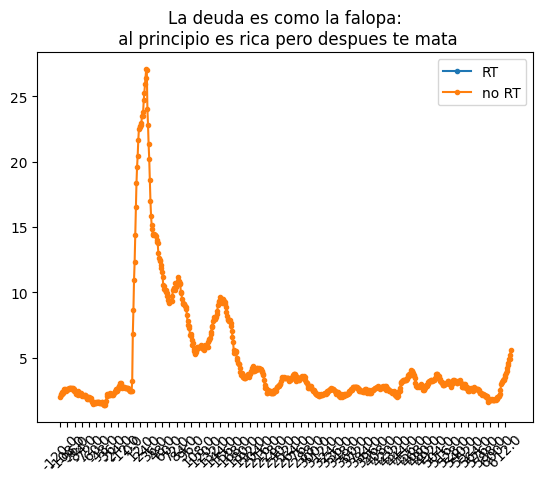

In [37]:
df_clus_completo = pd.read_csv(path_git+'../Tweets_august/inunda_mas_RT.csv')

df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600
#df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - pd.to_datetime('2019-02-27')).dt.total_seconds() / 3600


categoria = 'RT'

df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

df_categoria = [df_categoria_true, df_categoria_false]
labels = [categoria, 'no '+categoria]
root = 0

plt.figure()
plt.title('La deuda es como la falopa:\n al principio es rica pero despues te mata')
for i, df1 in enumerate(df_categoria):
    df = df1.copy()
    df_index = df.set_index('Fecha')

    df_count_hora = df_index.resample('1H').count()
    #df_count_hora = df_count_hora.reindex(pd.date_range(start=pd.to_datetime('2019-02-25'), end=pd.to_datetime('2019-03-31'), freq='1H'), fill_value=0) # Agrega 0s
    #plt.plot(df_count_hora.index, df_count_hora['Tweets'], label = 'sin rolling window'+str(i)) #Test comparation

    df_suavizado = df_count_hora.rolling('1D', center = True).mean()
    #plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.', linestyle = 'solid')
    plt.plot(df_suavizado.index, df_suavizado['Tweets'], label = labels[i], marker = '.', linestyle = 'solid')


plt.legend()
#plt.grid(0.7)




plt.xticks(rotation=45)
plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H'), labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12))-120)
#plt.xlim([datetime(2019, 8, 5), datetime(2019, 8, 12)])
plt.show()
#plt.savefig(path_git+f'/imagenes/imag_{index}.png')

In [35]:
df_clus_completo

,Unnamed: 0,id,Tweets,Tw_limpios,Fecha,urls,medios,source,HorasDesdeInicio
0,135,1158888767530459136,En el segundo donde dice “no se inunda mas” me...,segundo dice “ inunda mas ” hizo acordar Crist...,2019-08-06 23:53:07,https://twitter.com/todonoticias/status/115878...,False,Twitter for iPhone,138.764167
1,332,1158893418971574273,No se inunda más... No se inunda más... Carajo...,inunda ... inunda ... Carajo .. medio río ... ...,2019-08-07 00:11:36,NaN,False,Twitter for Android,139.072222
2,1616,1158935101759197184,Parece q si se inunda https://t.co/nBI6PhMfUv,Parece q si inunda,2019-08-07 02:57:14,https://m.ambito.com/alberto-y-cristina-ya-ara...,False,Facebook,141.832778
3,28489,1159779405239070720,@negra678 Es verdad ... no se inunda más caraj...,negra678 verdad ... inunda carajo ! ! ! ! Jaja...,2019-08-09 10:52:12,NaN,False,Twitter for Android,197.748889
4,30370,1159837917012824071,@bordo_cristina Cagaban en baldes por culpa de...,bordo_cristina Cagaban baldes culpa chorra jef...,2019-08-09 14:44:42,NaN,False,Twitter for iPhone,201.623889
...,...,...,...,...,...,...,...,...,...
1343,938302,1162779425714462721,No era que no se inunda maAAAaAsSSs? Tengo el ...,inunda maAAAaAsSSs ? agua rodilla Macri gato,2019-08-17 17:33:13,NaN,False,Twitter for iPhone,396.432500
1344,938843,1162785663864967168,el paso bajo nivel de lanús sigue inundado y m...,paso bajo nivel lanús sigue inundado mientras ...,2019-08-17 17:58:00,NaN,False,Twitter for iPhone,396.845556
1345,940459,1162806929791627264,Confieso que esto que me molestó sobremanera c...,"Confieso molestó sobremanera sucedió , altero ...",2019-08-17 19:22:30,https://youtu.be/etUd6NuaIx8,False,Twitter Web Client,398.253889
1346,945446,1162863812283965440,Uh qué gente boba. La frase “no se inunda más”...,Uh gente boba . frase “ inunda ” hace referenc...,2019-08-17 23:08:32,NaN,False,Twitter for iPhone,402.021111


In [36]:
for i in df_clus_completo['Tweets'][30:50]:
    print(i)

@Eonito @WaterTypeOP Ya ya, pero qué pasó?
Todos: los pijazos de agua.

Reportero: las lluvias asociadas al paso de la onda del Este. https://t.co/7AuTezYa4k
@fvrnandiito_ Ah, que es penaco, entonces paso, que mierda de agua, bro, te estas intoxicando
Y de paso no riegan medio inodoro 😉 https://t.co/6vSWQDnKLw
a mi vecino se le inundó el dpto y es tan inútil q no sabe cómo cerrar el paso del agua.. lo único q espero es q no se me haya entrado agua a mí tamb , porq lo mato 🌝🌝🌝🌝
@MiliberMancilla Te pasó lo mismo que a mí! Ahora las pobres están enchambranadas!
PD: Perdón si el término no es correcto pero así nos decía mi madre ya fallecida cuando todo estaba saturado de agua.
@HIDROCAPITALca @VasquezF_Evelyn Se sigue botando el agua y cada vez mas hundido el pavimento en la Calle La Montaña El Paraíso, Caracas. POR FAVOR URGENTE reparen tubería rota, son miles de litros botándose y no hay paso a nuestras casas. AUXILIO !!!
Y ya de paso... va a hacer algo para proteger nuestros ríos? O va

In [48]:
min(df_clus_completo[df_clus_completo['RT'] == False]['Fecha_x'])

'Fri Mar 08 18:08:18 +0000 2019'

In [25]:
for i in df_clus_completo['Tweets'].head(30):
    print(i,'  fin')

"Los gritos, los insultos, no hablan de mí: hablan de ustedes"
MACRI 2019   fin
"Los insultos no hablan de mi, sinl de ustedes" lo único cierto que dijo Macri en todo su mandato   fin
Macri textual: señores: los gritos e insultos no hablan de mi..hablan de ustedes..así se descalifica con educacion… https://t.co/Anrj3hj8Nf   fin
Mauricio Macri en el #Congreso, a los kirchneristas: "Los gritos y los insultos no hablan de mí, hablan de ustedes,… https://t.co/HbwLwfPLXe   fin
"Sus insultos no hablan de mi , hablan de como son ustedes" -Mauricio Macri 
Crack crack 👏🏻   fin
"Los gritos y los insultos no hablan de mí, hablan de ustedes, señores" https://t.co/d4LNR8YDtX   fin
"Los gritos y los insultos no me definen a mí. Los definen a ustedes..." Digan lo que quieran, pero que tremendo or… https://t.co/4hJYTHdAFG   fin
"Los gritos e insultos no hablan de mí, hablan de ustedes."
Presidente Mauricio Macri. 
1 marzo 2019.   fin
Dijo Macri: "Insisto, sus insultos, sus gritos, no hablan de mí, hab